In [1]:
from help.helper import Helper
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Baca dataset

In [2]:
df = pd.read_csv('dataset/stack-overflow-data.csv')
df = df[pd.notnull(df['tags'])]
print('Jumlah kata : ' + str(df['post'].apply(lambda x: len(x.split(' '))).sum()))
df.head()

Jumlah kata : 10286120


,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


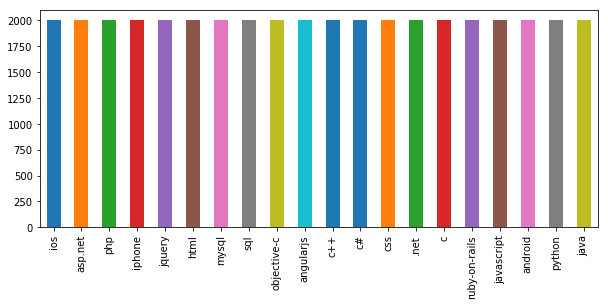

In [3]:
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar')
plt.show()

In [4]:
def print_data(index):
    example = df[df.index == index][['post', 'tags']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

### Contoh data sebelum tahap cleaning

In [5]:
print_data(10)

when we need interface c# <blockquote>    <strong>possible duplicate:</strong><br>   <a href= https://stackoverflow.com/questions/240152/why-would-i-want-to-use-interfaces >why would i want to use interfaces </a>   <a href= https://stackoverflow.com/questions/9451868/why-i-need-interface >why i need interface </a>    </blockquote>     i want to know where and when to use it     for example    <pre><code>interface idemo {  // function prototype  public void show(); }  // first class using the interface class myclass1 : idemo {  public void show()  {   // function body comes here   response.write( i m in myclass );  }  }  // second class using the interface class myclass2 : idemo {  public void show()   {   // function body comes here   response.write( i m in myclass2 );   response.write( so  what  );  } </code></pre>   these two classes has the same function name with different body. this can be even achieved without interface. then why we need an interface where and when to use it
Tag:

### Cleaning data

In [6]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # mengubah menjadi huruf kecil
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace simbol
    text = BAD_SYMBOLS_RE.sub('', text) # replace simbol
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # hapus stopword
    text = Helper.stem([text], use_tokenize=False)[0] # stemming data
    return text

df['post'] = df['post'].apply(clean)

### Contoh data setelah cleaning

In [7]:
print_data(10)
print('')
print('Jumlah kata setelah cleaning : ' + str(df['post'].apply(lambda x: len(x.split(' '))).sum()))

need interfac c# possibl duplic would want use interfac need interfac want know use exampl interfac idemo function prototyp public void show first class use interfac class myclass1 idemo public void show function bodi come responsewrit myclass second class use interfac class myclass2 idemo public void show function bodi come responsewrit myclass2 responsewrit two class function name differ bodi even achiev without interfac need interfac use
Tag: c#

Jumlah kata setelah cleaning : 3424297


### Pecah dataset menjadi data training dan testing

In [8]:
x = df.post
y = df.tags
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, test_size=0.075, random_state = 42)
(len(y_train), len(y_test))

(8000, 3000)

Data training : {'javascript': 438, 'android': 421, 'ruby-on-rails': 419, 'html': 418, 'mysql': 417, 'css': 409, 'iphone': 409, 'c': 408, '.net': 406, 'asp.net': 399, 'java': 397, 'c#': 397, 'python': 396, 'sql': 392, 'php': 387, 'jquery': 387, 'angularjs': 382, 'c++': 379, 'objective-c': 370, 'ios': 369}


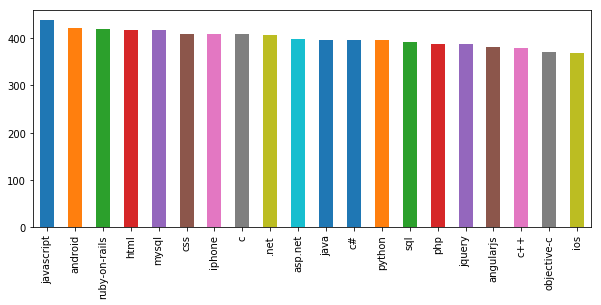

In [9]:
plt.figure(figsize=(10,4))
pd.DataFrame({'tags': y_train}).tags.value_counts().plot(kind='bar')
print('Data training : ' + str(dict(pd.DataFrame({'tags': y_train}).tags.value_counts())))
plt.show()

Data testing : {'ruby-on-rails': 169, 'ios': 168, 'sql': 160, 'java': 159, 'objective-c': 159, 'c++': 158, 'python': 157, 'php': 154, 'angularjs': 153, 'css': 152, 'iphone': 150, 'html': 149, '.net': 148, 'c#': 146, 'asp.net': 143, 'android': 142, 'jquery': 139, 'c': 136, 'mysql': 132, 'javascript': 126}


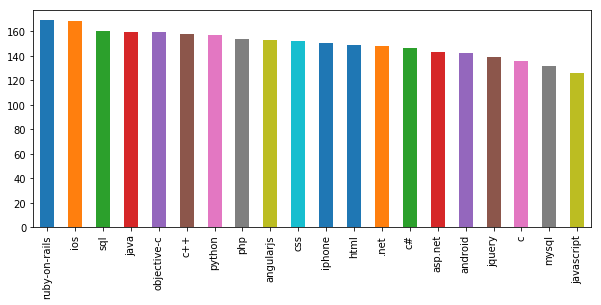

In [10]:
plt.figure(figsize=(10,4))
pd.DataFrame({'tags': y_test}).tags.value_counts().plot(kind='bar')
print('Data testing : ' + str(dict(pd.DataFrame({'tags': y_test}).tags.value_counts())))
plt.show()

### Tf-Idf

In [11]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [12]:
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [13]:
x_train.shape

(8000, 70707)

In [14]:
x_test.shape

(3000, 70707)

In [15]:
Helper.saveObjectTo('dataset/train_vector.pkl', {
    'x': x_train,
    'y': y_train
})

Helper.saveObjectTo('dataset/test_vector.pkl', {
    'x': x_test,
    'y': y_test
})